In [65]:
#import Librariws

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import scipy
import warnings

#Import Sklearn libary
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [66]:
# With ignore we can avoid warnings generated during execution
warnings.filterwarnings("ignore")

In [67]:
pd.options.display.max_columns = None
dt_train=pd.read_csv("train_titanic.csv",sep=',')
dt_test=pd.read_csv("test_titanic.csv",sep=',')
dt_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
print(dt_train.shape)
print(dt_test.shape)

(891, 12)
(418, 11)


In [69]:
dt_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [70]:
dt_copy=dt_train.copy()

In [71]:
dt_copy.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [72]:
dt_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [73]:
dt_copy.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Farthing, Mr. John",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [74]:
# Fill missing values
# fare 32
#embransed =S
#Age = 28

In [75]:

print(dt_copy['Age'].median())
new=pd.crosstab(dt_copy['Age'],dt_copy['Sex'])

28.0


In [76]:
pd.pivot_table(dt_copy,index=["Sex"],values=["Age"],aggfunc=np.median)


,Age
Sex,
female,27.0
male,29.0


In [77]:
dt_copy['Title'] = dt_copy['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
dt_copy['Title'].unique()
print(dt_copy.groupby('Title').size())

Title
Capt              1
Col               2
Don               1
Dr                7
Jonkheer          1
Lady              1
Major             2
Master           40
Miss            182
Mlle              2
Mme               1
Mr              517
Mrs             125
Ms                1
Rev               6
Sir               1
the Countess      1
dtype: int64


In [78]:
dt_copy['Family']=dt_copy['SibSp']+dt_copy['Parch']+1
dt_copy

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,2


In [79]:
value={'Age':28,'Embarked':'S'}
dt_copy.fillna(value=value,inplace=True)
replace_values = {'Capt':'common','Col':'common', 'Don':'common','Dr':'common','Jonkheer':'common','Lady':'common','Lady':'common',
                 'Major':'common','Mlle':'common','mme':'common','Ms':'common','Rev':'common','Sir':'common','the Countess':'common'}
dt_copy = dt_copy.replace({"Title": replace_values})

dt_copy.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Fare'],axis=1,inplace=True)


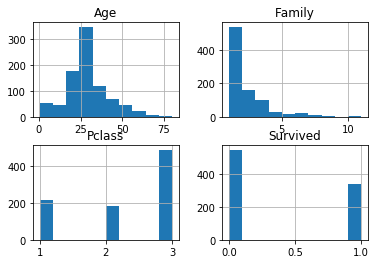

In [80]:
dt_copy.hist()
plt.show()

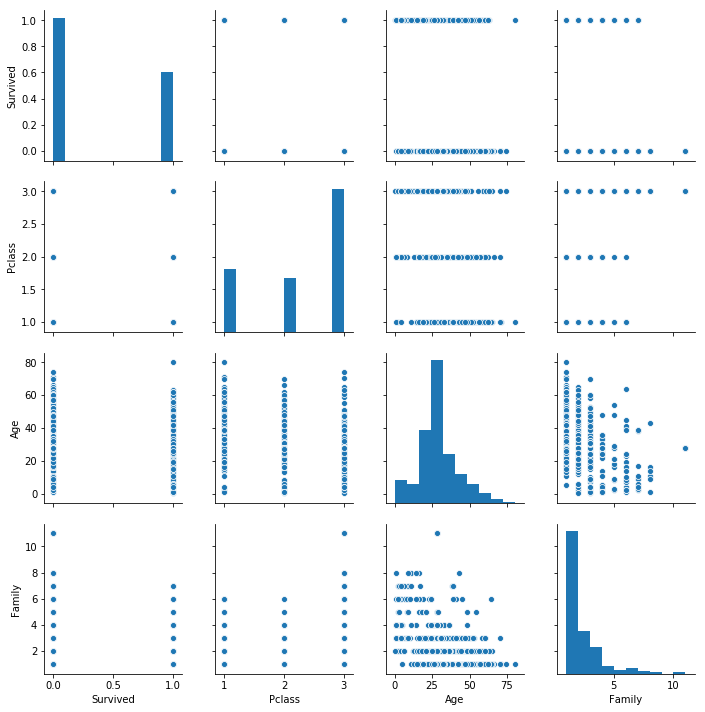

In [81]:
sns.pairplot(dt_copy)
plt.show()

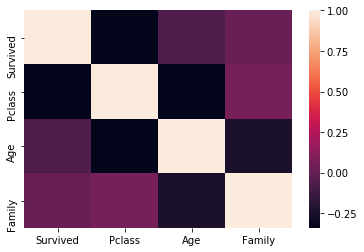

In [82]:
dt_corr=dt_copy.corr()
sns.heatmap(dt_corr)
plt.show()

In [83]:
dt_skew=dt_copy.skew()
dt_skew

Survived    0.478523
Pclass     -0.630548
Age         0.510245
Family      2.727441
dtype: float64

In [84]:
dt_copy=pd.get_dummies(dt_copy,drop_first=True).astype('float')

In [85]:
dt_skew=dt_copy.skew()
dt_skew

Survived         0.478523
Pclass          -0.630548
Age              0.510245
Family           2.727441
Sex_male        -0.618921
Embarked_Q       2.948778
Embarked_S      -1.009665
Title_Miss       1.469548
Title_Mme       29.849623
Title_Mr        -0.325752
Title_Mrs        2.075013
Title_common     5.604015
dtype: float64

['Survived', 'Pclass', 'Age', 'Family', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mme', 'Title_Mr', 'Title_Mrs', 'Title_common']
[ 0.47771747 -0.62948588  0.50938526  2.72284767 -0.61787841  2.94381099
 -1.00796412  1.46707327 29.7993477  -0.32520332  2.07151765  5.59457671]


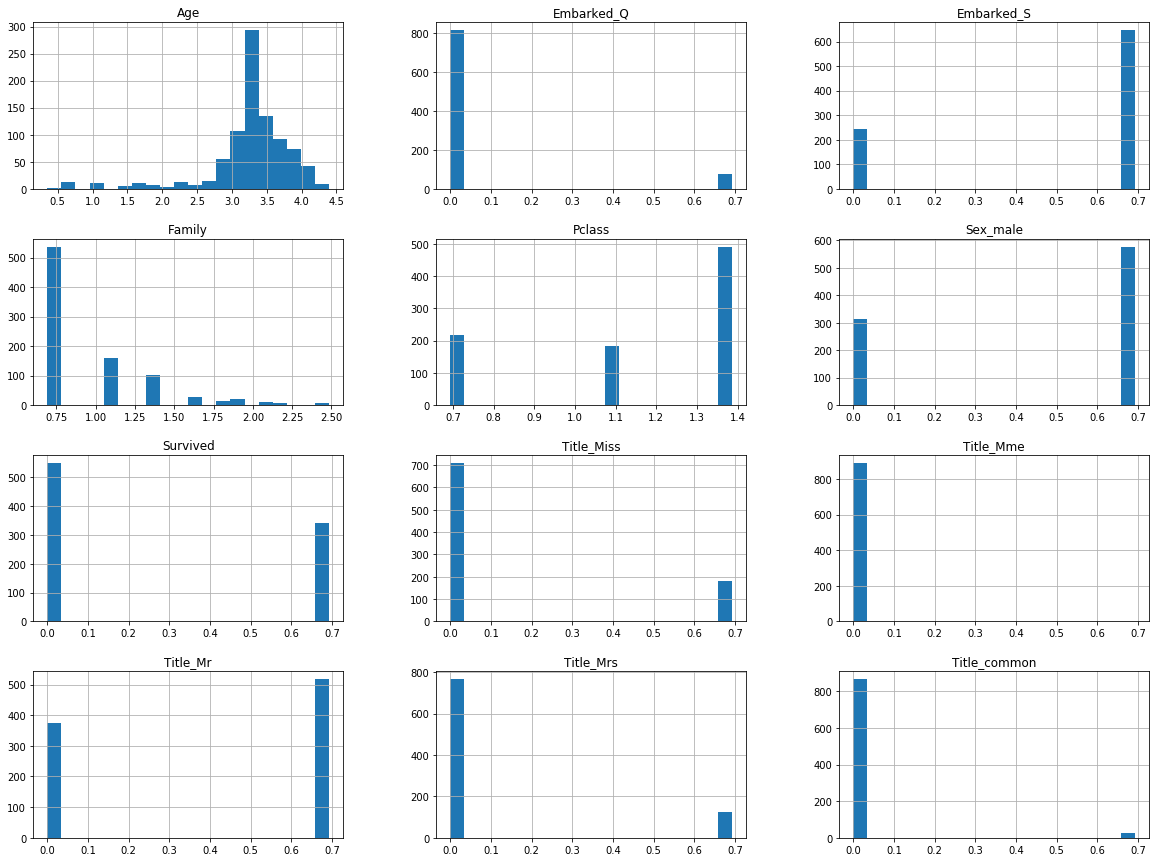

In [86]:
col_number = dt_copy.select_dtypes(include=['number']).columns.tolist()
print(col_number)
for col_transform in col_number:
    skewness = scipy.stats.skew(dt_copy[col_number])
print(skewness)
if skewness.all() > 0.75:
    dt_copy[col_number] = np.log1p(dt_copy[col_number])
        
dt_copy.hist(bins=20, figsize=(20, 15))
plt.show()

In [87]:
X=dt_copy.drop(['Survived'],axis=1).astype(float)
Y=dt_copy['Survived'].astype(float)

lab_enc =LabelEncoder()
Y = lab_enc.fit_transform(Y)


X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=7,test_size=0.20)


In [88]:
#Check Random algorithm
model=[]

model.append(('SVC',SVC()))
model.append(('NB',GaussianNB()))
model.append(('DC',DecisionTreeClassifier()))
model.append(('KNN',KNeighborsClassifier()))
model.append(('LogR',LogisticRegression()))




In [89]:
names=[]
result=[]
scoring='accuracy'
for name , algo in model:
    kfold=KFold(n_splits=10, random_state=7)
    cv_result=cross_val_score(algo,X_train,Y_train,scoring=scoring,cv=kfold)
    result.append(cv_result)
    names.append(name)
    msg=print(name,cv_result.mean()*100,cv_result.std())

SVC 81.3302034428795 0.0482345498846718
NB 76.8290297339593 0.06197319251776504
DC 80.48708920187794 0.0468374774715409
KNN 80.76682316118935 0.05157303350710465
LogR 81.04655712050078 0.050338024526183814


In [90]:
model2=[]
model2.append(('ScaleLogR',Pipeline([('Scaler',StandardScaler()),('LogR',LogisticRegression())])))
model2.append(('ScaleSVC',Pipeline([('Scaler',StandardScaler()),('SVC',SVC())])))
model2.append(('ScaleNB',Pipeline([('Scaler',StandardScaler()),('NB',GaussianNB())])))
model2.append(('ScaleDC',Pipeline([('Scaler',StandardScaler()),('DC',DecisionTreeClassifier())])))
model2.append(('ScaleKNN',Pipeline([('Scaler',StandardScaler()),('KNN',KNeighborsClassifier())])))
                                   

names=[]
result=[]
for name , algo in model2:
    kfold=KFold(n_splits=10, random_state=7)
    cv_result=cross_val_score(algo,X_train,Y_train,scoring='accuracy',cv=kfold,verbose=0)
    result.append(cv_result)
    names.append(name)
    msg=print(name,cv_result.mean()*100,cv_result.std())

ScaleLogR 82.87558685446011 0.06040872281864481
ScaleSVC 83.43896713615024 0.05536237047911203
ScaleNB 70.51643192488261 0.08517124540268133
ScaleDC 79.92566510172145 0.043099327419581834
ScaleKNN 81.75860719874804 0.05696750269261419


In [91]:
#Class for EDA 
#method for creating family and new title 
#method for fillna
#method for replace
#method for drop unwanted column
#method for dummies

#class expAnalysis:
#    def __init__(self):
        
    
    

In [92]:
pipeEse=[]
pipeEse.append(('ScaledAdaB',Pipeline([('Scaler',StandardScaler()),('AdaB',AdaBoostClassifier())])))
pipeEse.append(('ScaledGB',Pipeline([('Scaler',StandardScaler()),('GB',GradientBoostingClassifier())])))
pipeEse.append(('ScaledRFR',Pipeline([('Scaler',StandardScaler()),('RFR',RandomForestClassifier())])))
pipeEse.append(('ScaledETR',Pipeline([('Scaler',StandardScaler()),('ETR',ExtraTreesClassifier())])))

names=[]
result=[]
for name,model in pipeEse:
    kfolds=KFold(n_splits=10,random_state=7,)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfolds,scoring='accuracy')
    result.append(cv_results)
    names.append(name)
    print(name, cv_results.mean() ,cv_results.std())

ScaledAdaB 0.8203834115805947 0.05664047879223724
ScaledGB 0.8203638497652582 0.05312652320844465
ScaledRFR 0.8232003129890453 0.05865836620911522
ScaledETR 0.8091353677621284 0.058755699342079235


In [93]:
scaled=StandardScaler().fit(X_train)
trans=scaled.transform(X_train)

C_val=np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.2,1.5,1.8,2.0])
kernal=['linear', 'poly', 'rbf', 'sigmoid']
par_grid=dict(C=C_val,kernel=kernal)
fitmodel=SVC()
kfold=KFold(n_splits=10, random_state=7)
grid=GridSearchCV(estimator=fitmodel,param_grid=par_grid,scoring='accuracy',cv=kfold)
grid_result=grid.fit(trans,Y_train)
print("Best result for gridSearch",grid_result.best_score_,grid_result.best_params_)

#name=grid_result.cv_results_['mean_test_score']
#std=grid_result.cv_results_['std_test_score']
#param=grid_result.cv_results_['params']

#for name,std,param in zip(name,std,param):
#    print(name,std,param)

Best result for gridSearch 0.8328651685393258 {'C': 1.0, 'kernel': 'rbf'}


In [94]:
scaled=StandardScaler().fit(X_train)
trans=scaled.transform(X_train)

C_val=np.array([10,20,50,10,150,200,250,300,350,400,450,500])
#kernal=['linear', 'poly', 'rbf', 'sigmoid']
par_grid=dict(n_estimators=C_val)
fitmodel=RandomForestClassifier()
kfold=KFold(n_splits=10, random_state=7)
grid=GridSearchCV(estimator=fitmodel,param_grid=par_grid,scoring='accuracy',cv=kfold)
grid_result=grid.fit(trans,Y_train)
print("Best result for gridSearch",grid_result.best_score_,grid_result.best_params_)

Best result for gridSearch 0.8258426966292135 {'n_estimators': 10}


In [95]:
scaler=StandardScaler().fit(X_train)
trans=scaler.transform(X_train)
param_grid=dict(n_estimators=np.array([10,20,50,10,150,200,250,300,350,400,450,500]))
model=GradientBoostingClassifier(random_state=7)
kfolds=KFold(n_splits=10,random_state=7,)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv=kfolds)
grid_result=grid.fit(trans,Y_train)
print(grid_result.best_score_,grid_result.best_params_)

0.848314606741573 {'n_estimators': 20}


In [98]:
scale=StandardScaler().fit(X_train)
tran=scale.transform(X_train)
model=GradientBoostingClassifier(random_state=7,n_estimators=20)
model.fit(tran,Y_train)

model.fit(tran,Y_train)
trnsF2=scale.transform(X_test)
decision=model.predict(trnsF2)
finalScore=accuracy_score(decision,Y_test)
finalScore1=confusion_matrix(decision,Y_test)
finalScore2=classification_report(decision,Y_test)
print(finalScore)
print(finalScore1)
print(finalScore2)

0.776536312849162
[[95 25]
 [15 44]]
              precision    recall  f1-score   support

           0       0.86      0.79      0.83       120
           1       0.64      0.75      0.69        59

   micro avg       0.78      0.78      0.78       179
   macro avg       0.75      0.77      0.76       179
weighted avg       0.79      0.78      0.78       179



In [99]:
scaleF=StandardScaler().fit(X_train)
trnsF=scaleF.transform(X_train)
modelB=SVC(C=1.0,kernel='rbf',random_state=7)
modelB.fit(trnsF,Y_train)
trnsF2=scale.transform(X_test)
decision=model.predict(trnsF2)
finalScore=accuracy_score(decision,Y_test)
finalScore1=confusion_matrix(decision,Y_test)
finalScore2=classification_report(decision,Y_test)
print(finalScore)
print(finalScore1)
print(finalScore2)

0.776536312849162
[[95 25]
 [15 44]]
              precision    recall  f1-score   support

           0       0.86      0.79      0.83       120
           1       0.64      0.75      0.69        59

   micro avg       0.78      0.78      0.78       179
   macro avg       0.75      0.77      0.76       179
weighted avg       0.79      0.78      0.78       179

